In [32]:
import os
import tweepy as tw
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
import re
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [33]:
df = pd.read_csv('/content/jandor_twitter_data.csv')
df.head(5)

,Unnamed: 0,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,0,tanimolaolawal1,2023-01-01 23:59:17+00:00,1,Twitter for Android,@officialjandor There is no way a state will b...
1,1,kayodelewu,2023-01-01 23:38:56+00:00,0,Twitter for iPhone,@officialjandor Rest jare
2,2,Omobolaj_A_Star,2023-01-01 23:32:39+00:00,0,Twitter for Android,@CokerGrace4 @adedstv @officialjandor 37th gov...
3,3,atanda71,2023-01-01 23:14:02+00:00,4,Twitter for iPhone,@officialjandor Your deputy gave more attentio...
4,4,tadeb130,2023-01-01 22:35:40+00:00,0,Twitter for Android,@officialjandor This is why nobody takes you s...


In [34]:
tweets = df.iloc[:, -1].values

In [36]:
processed_tweets = []

for sentence in range(0, len(tweets)):
    # Remove all the special characters.
    processed_tweet = re.sub(r'\W', ' ', str(tweets[sentence]))

    # Remove all single characters as a result of removing the special characters.
    processed_tweet= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)

    # Remove single characters from the start.
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 

    # Replace multiple spaces with a single space.
    processed_tweet = re.sub(r'\s+', ' ', processed_tweet, flags=re.I)

    # Remove links from text.
    processed_tweet = re.sub(r'http\S+', '', processed_tweet)

    # Remove prefixed 'b'.
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)

    processed_tweets.append(processed_tweet)

In [37]:
clean_tweets = pd.DataFrame({'tweet': processed_tweets})
clean_tweets.head(5)

,tweet
0,officialjandor There is no way state will be ...
1,officialjandor Rest jare
2,CokerGrace4 adedstv officialjandor 37th gover...
3,officialjandor Your deputy gave more attentio...
4,officialjandor This is why nobody takes you s...


In [38]:
vader = SentimentIntensityAnalyzer()

function = lambda title: vader.polarity_scores(title)['compound']
clean_tweets['compound'] = clean_tweets['tweet'].apply(function)
clean_tweets

,tweet,compound
0,officialjandor There is no way state will be ...,-0.5319
1,officialjandor Rest jare,0.0000
2,CokerGrace4 adedstv officialjandor 37th gover...,0.0000
3,officialjandor Your deputy gave more attentio...,0.0000
4,officialjandor This is why nobody takes you s...,-0.8126
...,...,...
4996,ProgressiveEmi officialjandor funkeakindele Y...,-0.2960
4997,adebo2022 olawalemak1 officialjandor funkeaki...,-0.5258
4998,AremoAmir lagosforlagos ObiFlagboy GRVlagos o...,-0.1877
4999,Hi_Am_A_Human GRVlagos officialjandor Place y...,0.4404


In [39]:
def getAnalysis(score):
 if score < 0:
    return 'Negative'
 elif score == 0:
    return 'Neutral'
 else:
    return 'Positive'

clean_tweets['sentiment'] = clean_tweets['compound'].apply(getAnalysis)
clean_tweets

,tweet,compound,sentiment
0,officialjandor There is no way state will be ...,-0.5319,Negative
1,officialjandor Rest jare,0.0000,Neutral
2,CokerGrace4 adedstv officialjandor 37th gover...,0.0000,Neutral
3,officialjandor Your deputy gave more attentio...,0.0000,Neutral
4,officialjandor This is why nobody takes you s...,-0.8126,Negative
...,...,...,...
4996,ProgressiveEmi officialjandor funkeakindele Y...,-0.2960,Negative
4997,adebo2022 olawalemak1 officialjandor funkeaki...,-0.5258,Negative
4998,AremoAmir lagosforlagos ObiFlagboy GRVlagos o...,-0.1877,Negative
4999,Hi_Am_A_Human GRVlagos officialjandor Place y...,0.4404,Positive


In [40]:
clean_tweets['sentiment'].value_counts()

Positive    2309
Neutral     1537
Negative    1155
Name: sentiment, dtype: int64

Text(0, 0.5, 'sanwoolu Sentiment')

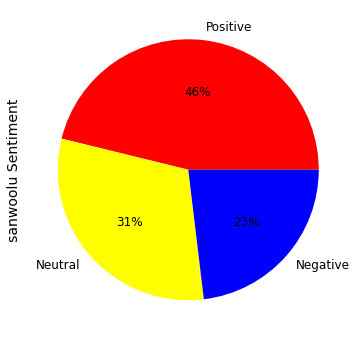

In [41]:
clean_tweets.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',  fontsize=12, figsize=(9,6), colors=["red", "yellow", "blue"])
plt.ylabel("sanwoolu Sentiment", size=14)

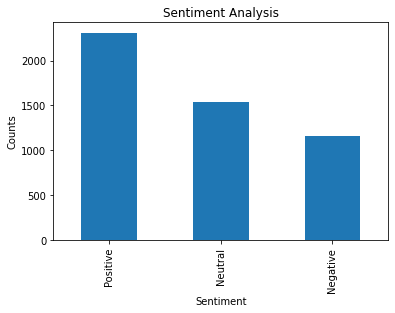

In [42]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
clean_tweets['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

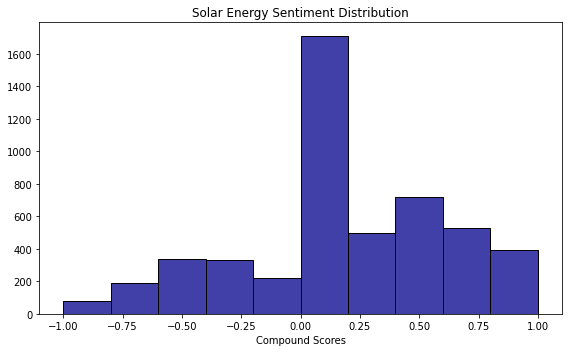

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(clean_tweets, x='compound', color="darkblue", bins=10, binrange=(-1, 1))
plt.title("Solar Energy Sentiment Distribution")
plt.xlabel("Compound Scores")
plt.ylabel("")
plt.tight_layout()

In [44]:
features = clean_tweets.iloc[:, 0].values
labels = clean_tweets.iloc[:, -1].values

In [45]:
# Clean the text data by preprocessing it with regular expressions. 
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters.
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # Remove all single characters as a result of removing the special characters.
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start.
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substitute multiple spaces with a single space.
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Remove prefixed 'b'.
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Convert text to Lowercase.
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [46]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [48]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [49]:
# Create model object. 
model_rf = RandomForestClassifier(n_estimators = 200, random_state=0)
# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

In [50]:
rf = accuracy_score(y_test_data, predictions_rf)
print(rf)

0.7662337662337663


In [51]:
print(classification_report(y_test_data, predictions_rf))

              precision    recall  f1-score   support

    Negative       0.83      0.38      0.52       223
     Neutral       0.76      0.91      0.83       328
    Positive       0.76      0.86      0.80       450

    accuracy                           0.77      1001
   macro avg       0.78      0.71      0.72      1001
weighted avg       0.78      0.77      0.75      1001



In [52]:
# Create model object. 
model_lr = LogisticRegression(max_iter=150)
# Train the model on the training data.
model_lr.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_lr = model_lr.predict(x_test_data)

In [53]:
lr = accuracy_score(y_test_data, predictions_lr)
print(lr)

0.7612387612387612


In [54]:
print(classification_report(y_test_data, predictions_lr))

              precision    recall  f1-score   support

    Negative       0.71      0.46      0.56       223
     Neutral       0.76      0.86      0.80       328
    Positive       0.78      0.84      0.81       450

    accuracy                           0.76      1001
   macro avg       0.75      0.72      0.72      1001
weighted avg       0.76      0.76      0.75      1001



In [55]:
# Create model object. 
model_kn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
# Train the model on the training data.
model_kn.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_kn = model_kn.predict(x_test_data)

In [56]:
kn = accuracy_score(y_test_data, predictions_kn)
print(kn)

0.3886113886113886


In [57]:
print(classification_report(y_test_data, predictions_kn))

              precision    recall  f1-score   support

    Negative       0.75      0.04      0.08       223
     Neutral       0.35      0.97      0.51       328
    Positive       0.87      0.14      0.23       450

    accuracy                           0.39      1001
   macro avg       0.66      0.38      0.27      1001
weighted avg       0.67      0.39      0.29      1001



In [58]:
# Create model object. 
model_sv = SVC()
# Train the model on the training data.
model_sv.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_sv = model_sv.predict(x_test_data)

In [59]:
sv = accuracy_score(y_test_data, predictions_sv)
print(sv)

0.7392607392607392


,Model,Accuracy_score
0,Random Forest,0.766234
1,Logistic Regression,0.761239
3,Support Vector Machine,0.739261
2,KNeighbours,0.388611


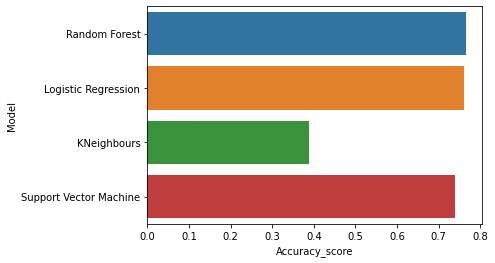

In [60]:
models = pd.DataFrame({
    'Model':['Random Forest', 'Logistic Regression', 'KNeighbours', 'Support Vector Machine'],
    'Accuracy_score' :[rf, lr, kn, sv]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)